In [1]:
NAME = "Hs_ProtBERT"

# UTILITARIES
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from Bio import SeqIO

In [2]:
X = np.load('Hs_all_train_embeddings.npy')
#X=X[1:50000]
L=np.load('Hs_all_train_ids.npy')
#L=L[1:50000]

In [3]:
#Dimensionality reduction with UMAP
import umap.umap_ as umap
s=umap.UMAP().fit(X)
df_c = pd.DataFrame(s.embedding_)
df_c.columns=['x','y']
df_a = pd.DataFrame()
#df_a.columns=['x','y']
df_a['x']=df_c['x']
df_a['y']=df_c['y']

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
#df_c=pd.read_csv('Hs_Dm_T5_umap_gmm_clusters.csv')

In [5]:
#Calculating the Sillhouette score for different number of clusters
from sklearn import metrics
from sklearn.mixture import GaussianMixture 

silhouette_average = []

K = range(2, 20)

df_a = pd.DataFrame()
#df_a.columns=['x','y']
df_a['x']=df_c['x']
df_a['y']=df_c['y']
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=12345)
    cluster_labels=gmm.fit_predict(df_a) 
    silhouette_score = metrics.silhouette_score(df_a, cluster_labels)
    silhouette_average.append([k, silhouette_score])

silhouette_average = np.array(silhouette_average)
np.savetxt(NAME+'_umap_gmm_silhouette_scores.txt', silhouette_average)
n_clusters = int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0])
print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
      "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1],
      "\n",
      silhouette_average)

n_clusters = 6 The average silhouette_score is : 0.4381 
 [[ 2.          0.35417697]
 [ 3.          0.34749261]
 [ 4.          0.38751093]
 [ 5.          0.39364704]
 [ 6.          0.43809766]
 [ 7.          0.33380783]
 [ 8.          0.33948895]
 [ 9.          0.26227972]
 [10.          0.3199324 ]
 [11.          0.3547819 ]
 [12.          0.3668319 ]
 [13.          0.35047826]
 [14.          0.33969125]
 [15.          0.33865896]
 [16.          0.35620454]
 [17.          0.35701707]
 [18.          0.36069521]
 [19.          0.35933739]]


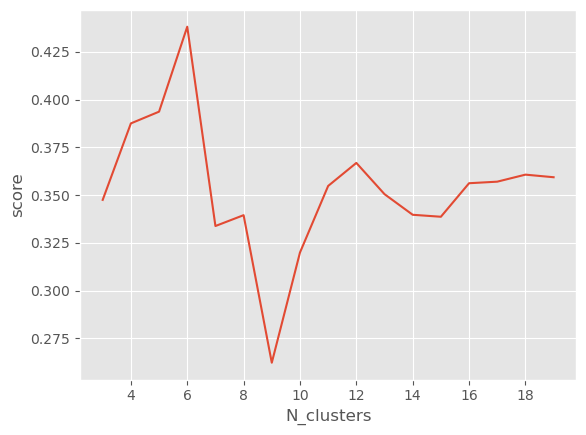

In [6]:
#Plotting the Sillhouette score for different number of clusters
a=pd.read_table(NAME+'_umap_gmm_silhouette_scores.txt', index_col=None, sep = ' ')
a.columns=['N_clusters','score']
plot=sns.lineplot(
    x="N_clusters", y="score", data=a,
);
plot.figure.savefig(NAME+'_umap_gmm_silhouette_scores.svg')

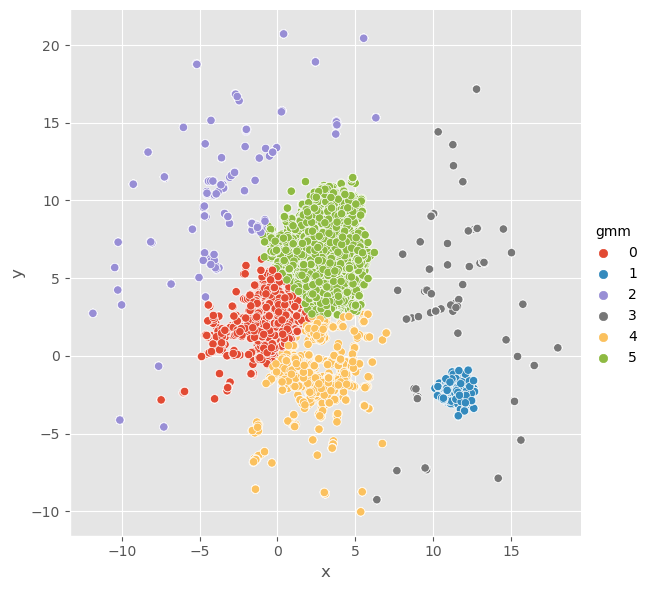

In [7]:
#GMM-based clustering
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components = n_clusters, random_state=12345) 
#df_c = pd.DataFrame(s.embedding_)
#df_c.columns=['x','y']
df_a["gmm"] = gmm.fit_predict(df_a)
df_a["gmm"] = df_a["gmm"].astype("category")

df_a.head()
plot=sns.relplot(
    x="x", y="y", hue="gmm", data=df_a, height=6,
);

In [8]:
plot.figure.savefig(NAME+"_umap_gmm.svg")

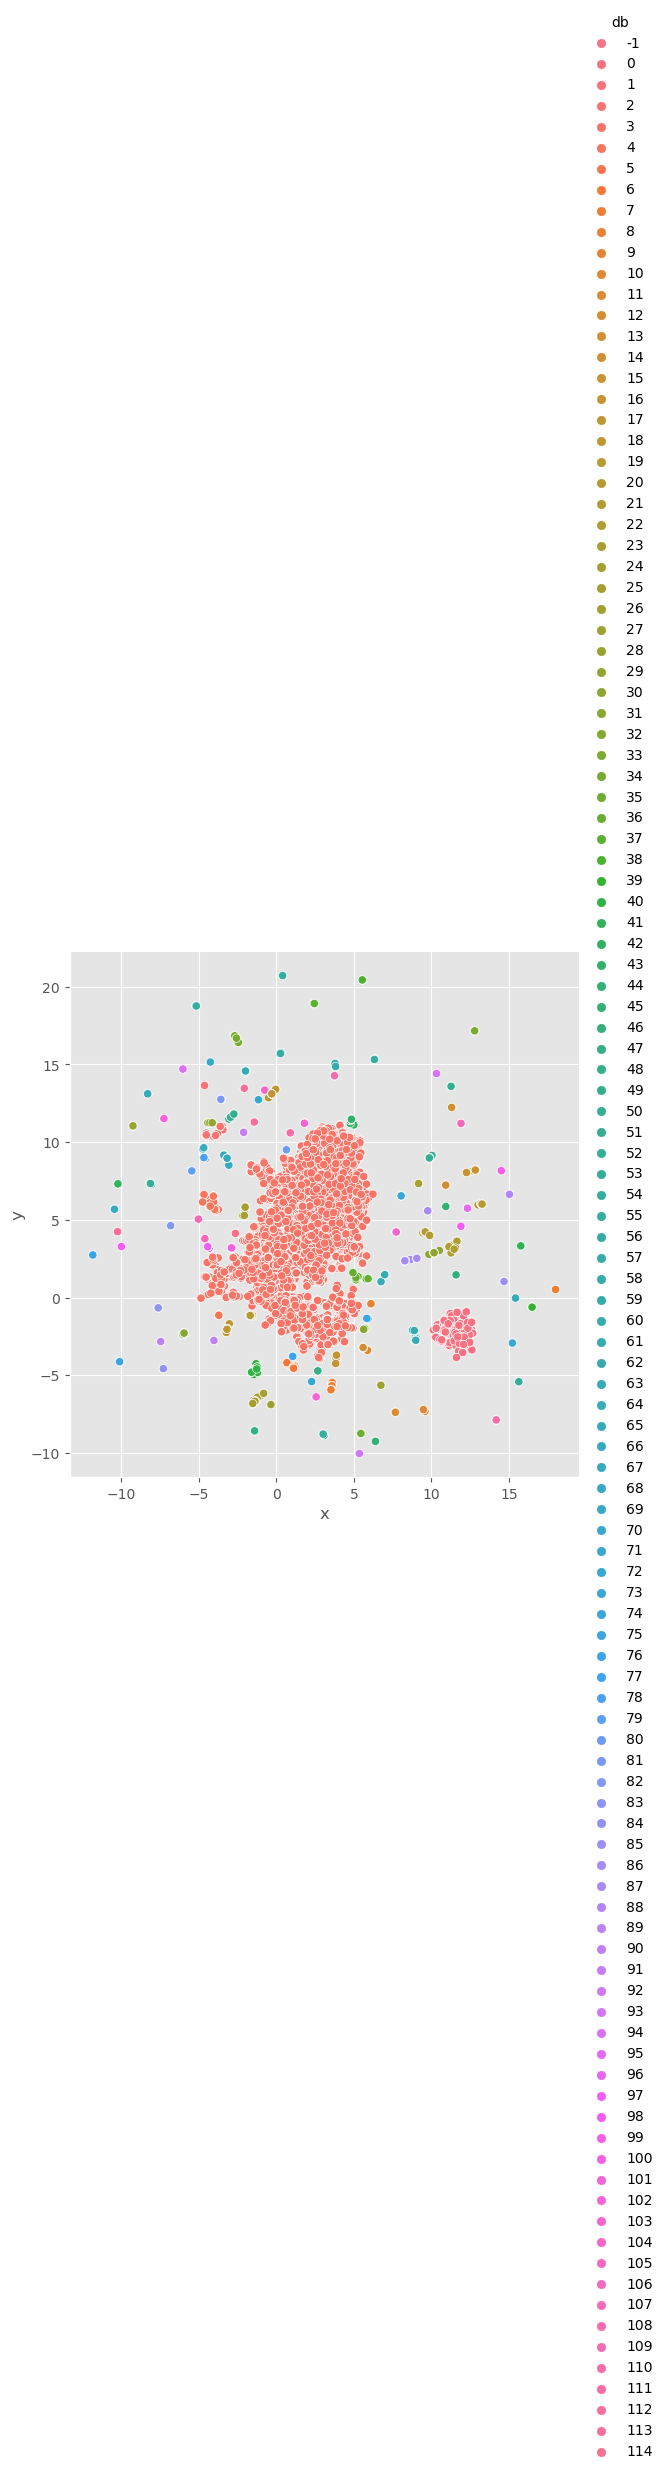

In [9]:
#Cluster analysis with DBSCAN
from sklearn.cluster import DBSCAN
db=DBSCAN()
#df_c = pd.DataFrame()
#df_c['x']=r[:,1]
#df_c['y']=r[:,2]
#df_c.columns=['x','y']
df_b = pd.DataFrame()
df_b['x']=df_c['x']
df_b['y']=df_c['y']
db.fit(df_b)
df_b["db"] = db.labels_
df_b["db"] = df_b["db"].astype("category")

df_a.head()
plot=sns.relplot(
    x="x", y="y", hue="db", data=df_b, height=6,
);

In [10]:
hover_data = pd.DataFrame({
                           'label':L})
df_a['id']=hover_data['label']
df_a.to_csv(NAME+'_umap_gmm_clusters.csv')

In [11]:
hover_data = pd.DataFrame({
                           'label':L})
df_b['id']=hover_data['label']
df_b.to_csv(NAME+'_umap_dbscan_clusters.csv')

In [12]:
plot.figure.savefig(NAME+"_umap_dbscan.svg")

In [13]:
#Dimensionality reduction with tSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

reducer = TSNE(n_jobs=10)
r = reducer.fit_transform(X)


In [14]:
#Calculating the Sillhouette score for different number of clusters
silhouette_average = []

K = range(2, 20)

df_d = pd.DataFrame()
df_d['x']=r[:,0]
df_d['y']=r[:,1]
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=12345)
    cluster_labels=gmm.fit_predict(df_d) 
    silhouette_score = metrics.silhouette_score(df_d, cluster_labels)
    silhouette_average.append([k, silhouette_score])

silhouette_average = np.array(silhouette_average)
np.savetxt(NAME+'_tsne_gmm_silhouette_scores.txt', silhouette_average)
n_clusters = int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0])
print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
      "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1],
      "\n",
      silhouette_average)

n_clusters = 2 The average silhouette_score is : 0.3931 
 [[ 2.          0.39312889]
 [ 3.          0.38600021]
 [ 4.          0.36128377]
 [ 5.          0.33421149]
 [ 6.          0.34206498]
 [ 7.          0.35782035]
 [ 8.          0.35321334]
 [ 9.          0.3517173 ]
 [10.          0.35164471]
 [11.          0.3483795 ]
 [12.          0.34068004]
 [13.          0.34741026]
 [14.          0.35025958]
 [15.          0.34292775]
 [16.          0.33921715]
 [17.          0.33474175]
 [18.          0.35059604]
 [19.          0.34605226]]


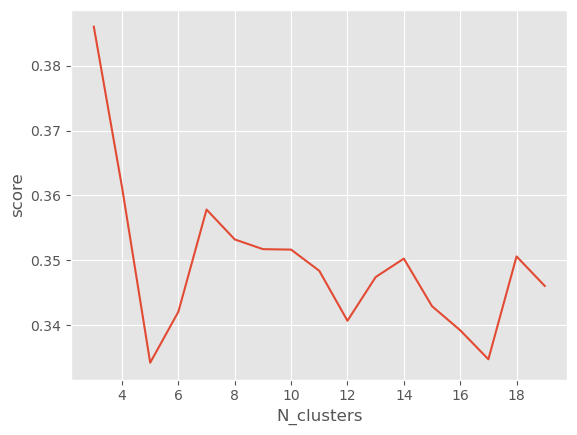

In [15]:

a=pd.read_table(NAME+'_tsne_gmm_silhouette_scores.txt', index_col=None, sep = ' ')
a.columns=['N_clusters','score']
plot=sns.lineplot(
    x="N_clusters", y="score", data=a,
);
plot.figure.savefig(NAME+'_tsne_gmm_silhouette_scores.svg')

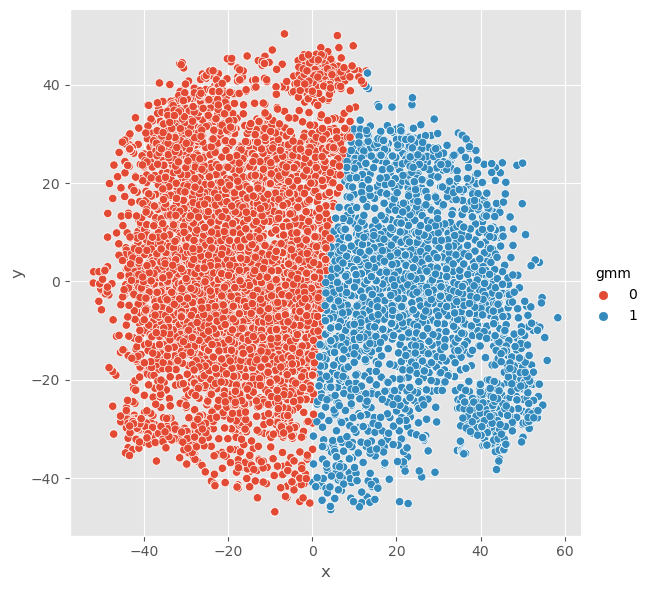

In [16]:
gmm = GaussianMixture(n_components = n_clusters) 
df_d = pd.DataFrame()
df_d['x']=r[:,0]
df_d['y']=r[:,1]
#df_c.columns=['x','y']
df_d["gmm"] = gmm.fit_predict(df_d)
df_d["gmm"] = df_d["gmm"].astype("category")

df_d.head()
plot=sns.relplot(
    x="x", y="y", hue="gmm", data=df_d, height=6,
);

In [17]:
plot.figure.savefig(NAME+"_tsne_gmm.svg")

In [18]:
hover_data = pd.DataFrame({
                           'label':L})
df_d['id']=hover_data['label']
df_d.to_csv(NAME+'_tsne_gmm_clusters.csv')

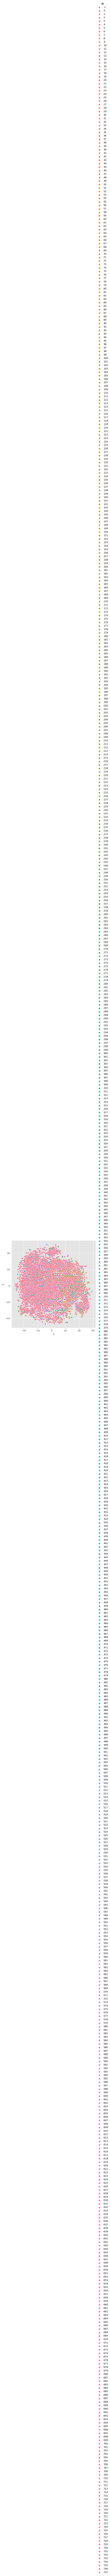

In [19]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2,min_samples=4,metric='euclidean')
#df_c = pd.DataFrame()
#df_c['x']=r[:,1]
#df_c['y']=r[:,2]
#df_c.columns=['x','y']
df_f = pd.DataFrame()
df_f['x']=df_d['x']
df_f['y']=df_d['y']
db.fit(df_f)
df_f["db"] = db.labels_
df_f["db"] = df_f["db"].astype("category")

df_a.head()
plot=sns.relplot(
    x="x", y="y", hue="db", data=df_f, height=6,
);

In [20]:
df_f['id']=hover_data['label']
df_f.to_csv(NAME+'_tsne_dbscan_clusters.csv')

In [21]:
plot.figure.savefig(NAME+"_tsne_dbscan.svg")

In [22]:
#Principal component analysis
%%time
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
p = pca.fit_transform(X)
v4color = pd.Series(p[:,0])
v4color.name = 'PCA1'
print(np.sum(pca.explained_variance_ratio_))

0.6355223
CPU times: user 1.62 s, sys: 70.6 ms, total: 1.69 s
Wall time: 196 ms


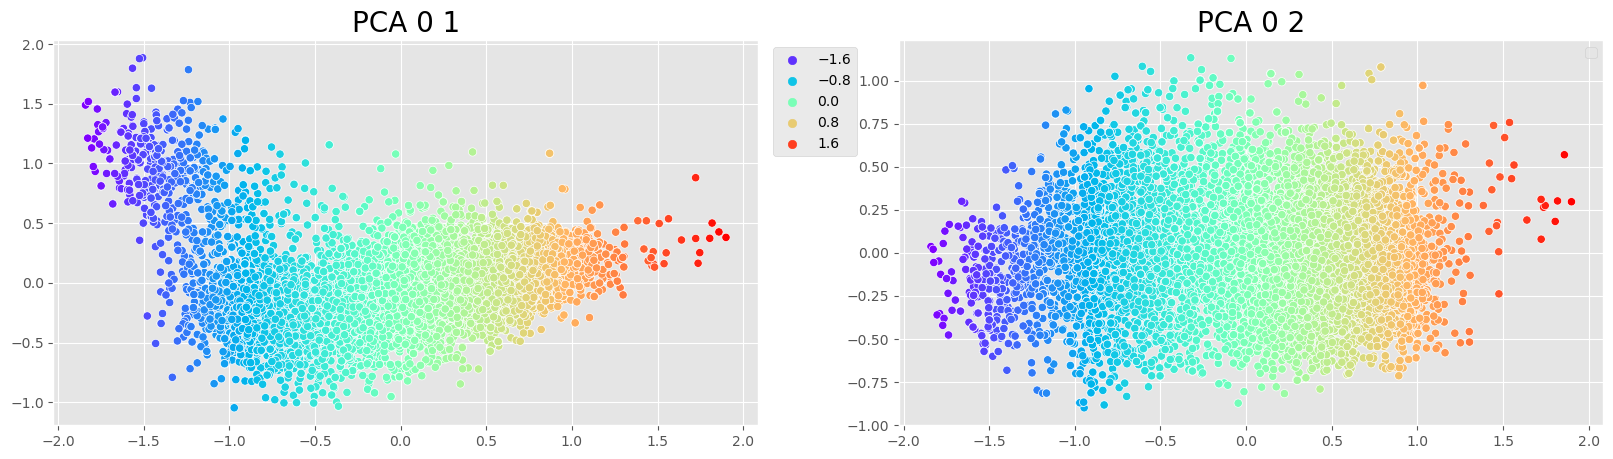

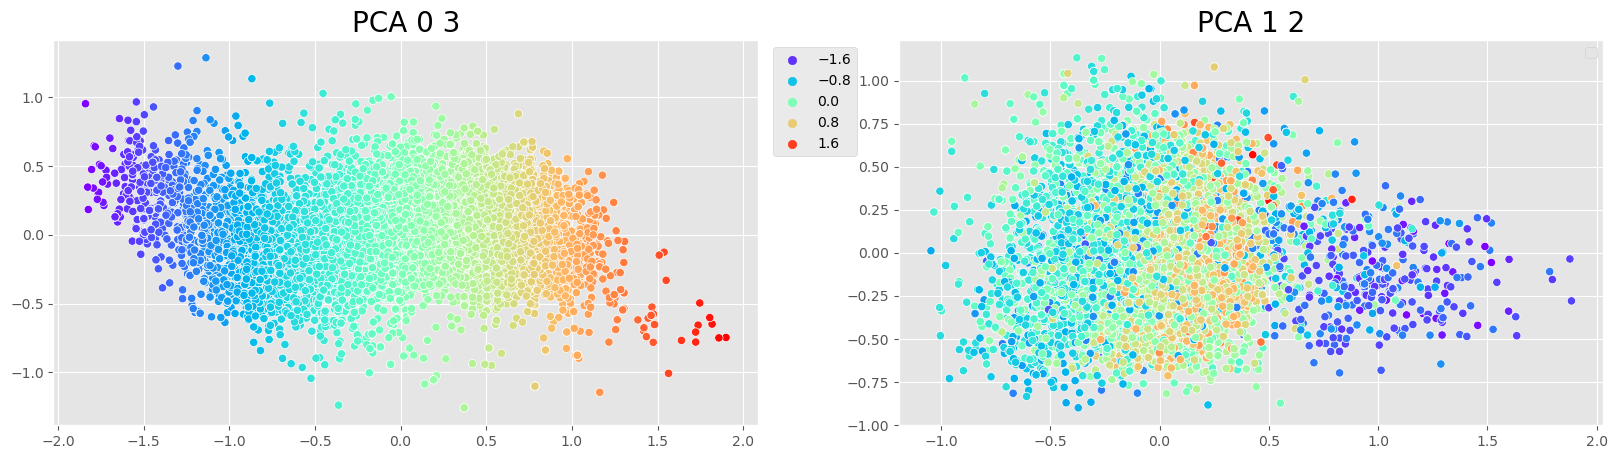

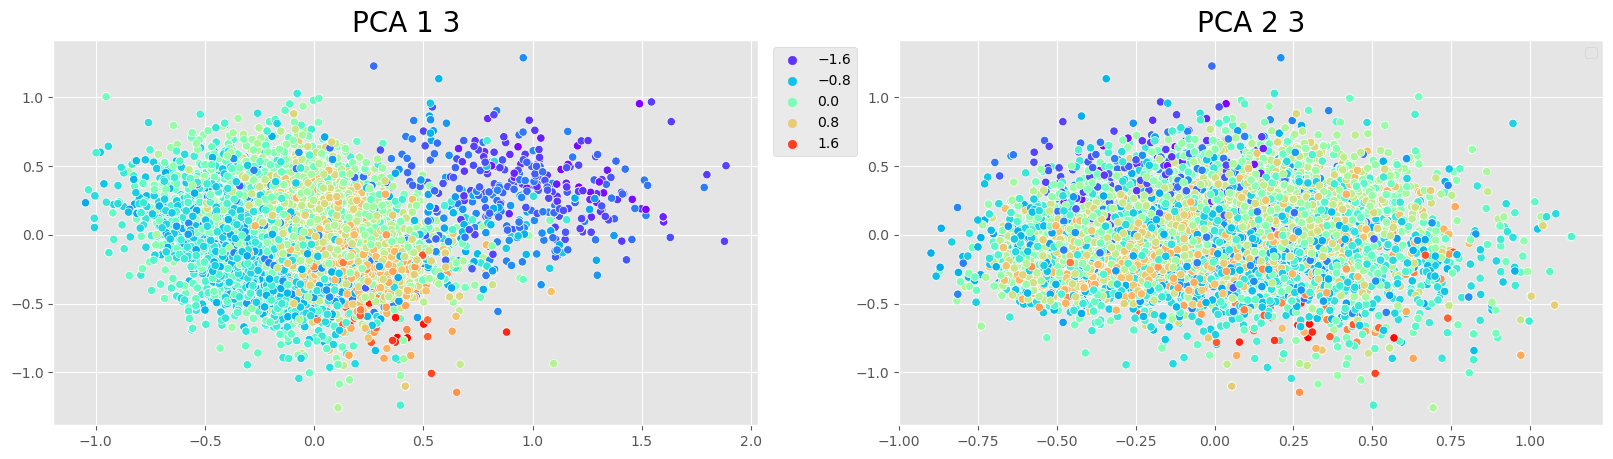

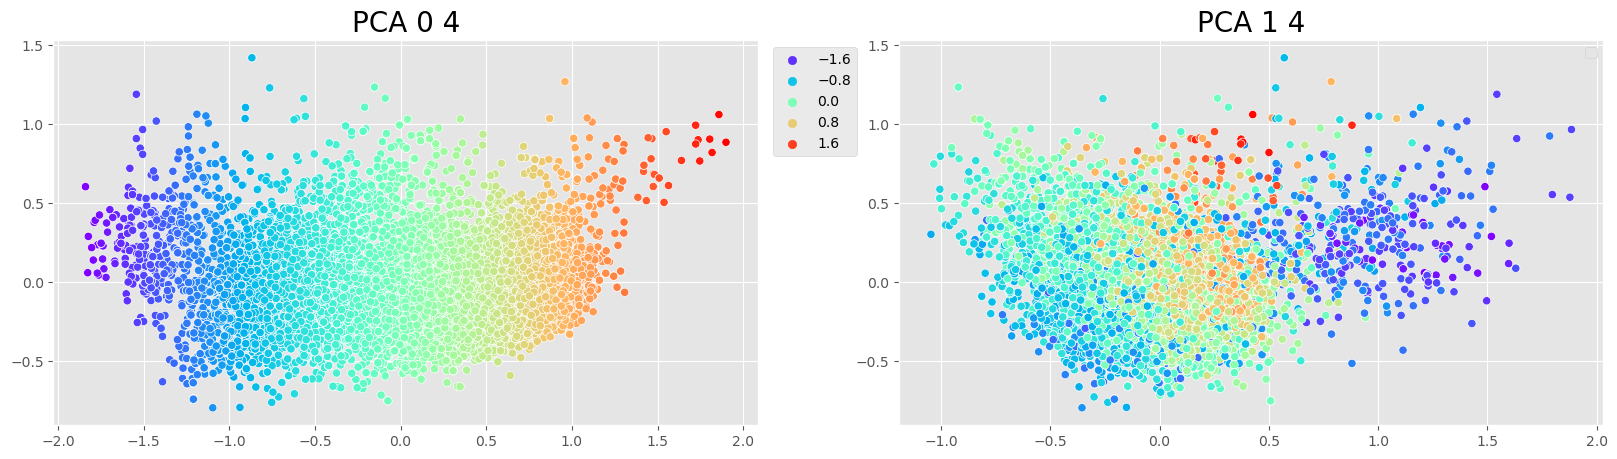

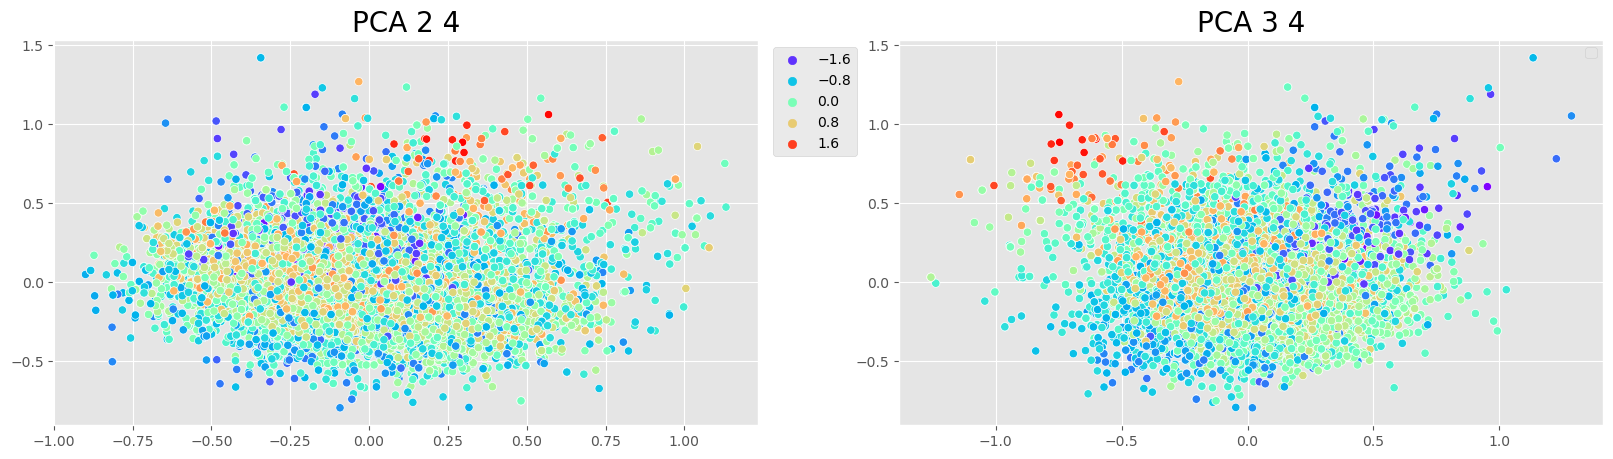

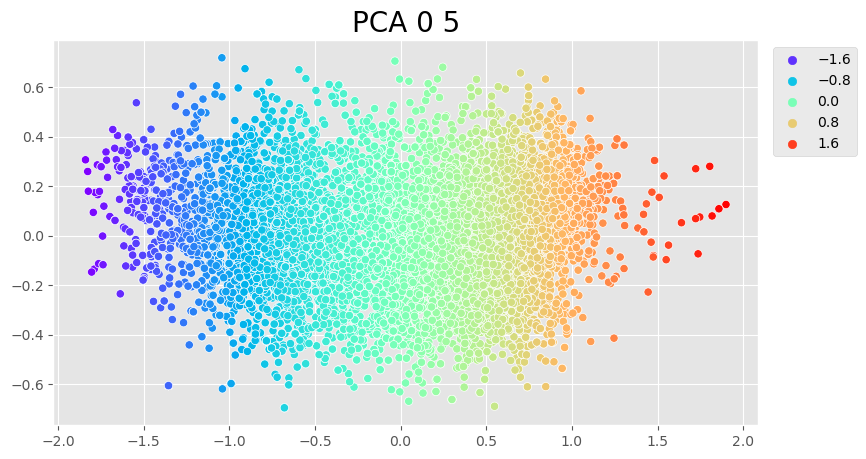

CPU times: user 6.73 s, sys: 1.82 s, total: 8.54 s
Wall time: 3.57 s


In [23]:
%%time 
n_x_subplots = 2
marker1 =  'o' # 'o' #
palette1 = 'rainbow' #  "viridis"  #  'rainbow' #  "viridis"# 
alpha1 = 1 
c = 0
cc = 0
for (i,j) in [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3),(0,4),(1,4),(2,4),(3,4), (0,5)]:
    cc += 1
    if c % n_x_subplots == 0:
        if c > 0:
            plt.show()
        fig = plt.figure(figsize = (20,5) ); c = 0


    c += 1; fig.add_subplot(1,n_x_subplots ,c)

    ax = sns.scatterplot(x = p[:,i],y=p[:,j], hue = v4color,  palette = palette1,  marker = marker1 , alpha = alpha1 )
    if c == 1:
        plt.setp(ax.get_legend().get_texts(), fontsize=12) # for legend text
        plt.setp(ax.get_legend().get_title(), fontsize=12) # for legend title    
        plt.legend( bbox_to_anchor = (1.15, 1.), loc='upper right')
    else:
        plt.legend('')
    plt.title('PCA '+str(i)+' '+str(j), fontsize = 20)
    
    
    
plt.show() 

In [24]:
#Calculating the Sillhouette score for different number of clusters
silhouette_average = []

K = range(2, 20)

df_e = pd.DataFrame()
df_e['x']=p[:,0]
df_e['y']=p[:,1]
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=12345)
    cluster_labels=gmm.fit_predict(df_e) 
    silhouette_score = metrics.silhouette_score(df_e, cluster_labels)
    silhouette_average.append([k, silhouette_score])

silhouette_average = np.array(silhouette_average)
np.savetxt(NAME+'_pca01_gmm_silhouette_scores.txt', silhouette_average)
n_clusters = int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0])
print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
      "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1],
      "\n",
      silhouette_average)

n_clusters = 3 The average silhouette_score is : 0.5367 
 [[ 2.          0.52570456]
 [ 3.          0.53672606]
 [ 4.          0.43139362]
 [ 5.          0.36994541]
 [ 6.          0.34820631]
 [ 7.          0.34345859]
 [ 8.          0.33509663]
 [ 9.          0.3207646 ]
 [10.          0.32094288]
 [11.          0.32511598]
 [12.          0.31989342]
 [13.          0.30915231]
 [14.          0.30513269]
 [15.          0.30161098]
 [16.          0.31185102]
 [17.          0.30146921]
 [18.          0.31588295]
 [19.          0.30681035]]


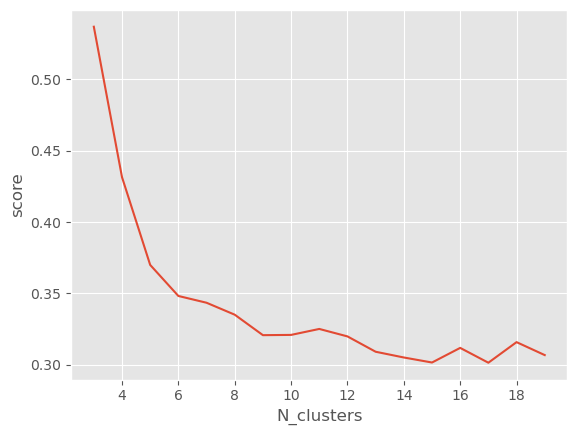

In [25]:
a=pd.read_table(NAME+'_pca01_gmm_silhouette_scores.txt', index_col=None, sep = ' ')
a.columns=['N_clusters','score']
plot=sns.lineplot(
    x="N_clusters", y="score", data=a,
);
plot.figure.savefig(NAME+'_pca01_gmm_silhouette_scores.svg')

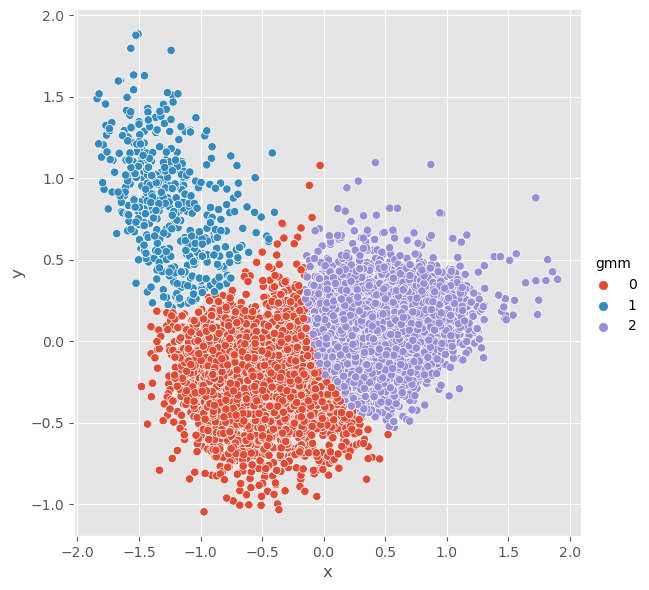

In [26]:
gmm = GaussianMixture(n_components = n_clusters) 
df_e = pd.DataFrame()
df_e['x']=p[:,0]
df_e['y']=p[:,1]
#df_c.columns=['x','y']
df_e["gmm"] = gmm.fit_predict(df_e)
df_e["gmm"] = df_e["gmm"].astype("category")

df_e.head()
plot=sns.relplot(
    x="x", y="y", hue="gmm", data=df_e, height=6,
);

In [27]:
plot.figure.savefig(NAME+"_pca01_3gmm.svg")

In [28]:
hover_data = pd.DataFrame({
                           'label':L})
df_e['id']=hover_data['label']
df_e.to_csv(NAME+'_pca01_3gmm_clusters.csv')

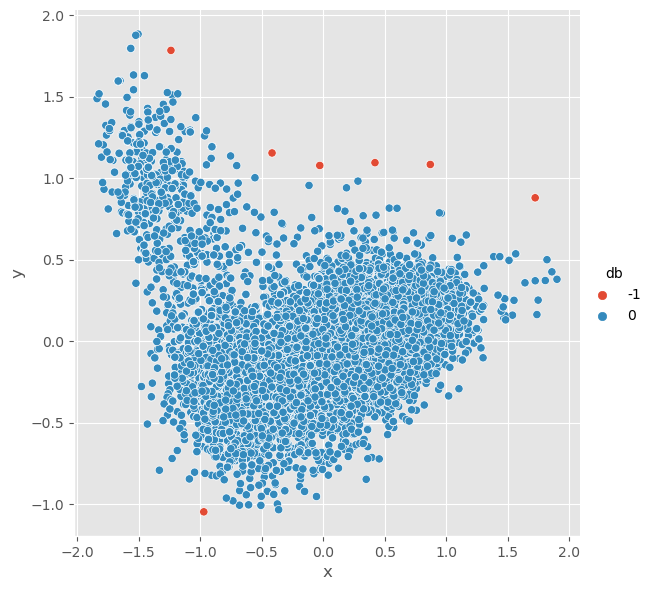

In [29]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2,min_samples=4,metric='euclidean')
#df_c = pd.DataFrame()
#df_c['x']=r[:,1]
#df_c['y']=r[:,2]
#df_c.columns=['x','y']
df_g = pd.DataFrame()
df_g['x']=df_e['x']
df_g['y']=df_e['y']
db.fit(df_g)
df_g["db"] = db.labels_
df_g["db"] = df_g["db"].astype("category")

df_g.head()
plot=sns.relplot(
    x="x", y="y", hue="db", data=df_g, height=6,
);

In [30]:
plot.figure.savefig(NAME+"_pca01_dbscan.svg")

In [31]:
df_g['id']=hover_data['label']
df_g.to_csv(NAME+'_tsne_dbscan_clusters.csv')